<a href="https://colab.research.google.com/github/origin1508/pytorch-cheatsheet/blob/main/Pytorch_cheatsheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 코랩 단축키
|단축키|명령|
|---|---|
|Ctrl + M H|단축키 보기|
|Ctrl + Enter|초점이 맞춰진 셀 실행|
|Shift + Enter|셀 실행후 다음셀로|
|Alt + Enter|셀 실행후 새 셀 생성|
|Ctrl + M .|런타임 다시 시작|
|Ctrl + M B|아래에 코드 셀 삽입|
|Ctrl + M A|위에 코드 셀 삽입|
|Ctrl + M D|셀 지우기|
|Ctrl + M Y|코드 셀로 변경|
|Ctrl + M M|마크다운 셀로 변경|


## 사전설정
* `%matplotlib` : 현재 노트북에 plotting을 하게 해주는 magic command
* inline : 노트북 내부에 출력하도록 설정

> **magic command**는 IPython 인터프리터에 추가된 특수 명령어. 명령어 앞에 `%`기호를 붙여 사용한다.

In [3]:
%matplotlib inline

In [4]:
import torch
import torch.nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

### 구글 드라이브 mount
* %cd : 디렉토리 이동
* %ls : 현재 디렉토리의 내용을 확인

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks/
%ls

/content/drive/MyDrive/Colab Notebooks
 MNIST.ipynb                 YOLO.ipynb
'one-hot encoding.ipynb'     yolov5_custom_training-2.ipynb
'Pytorch cheatsheet.ipynb'  '파일입출력_2.ipynb의 사본'


## 코랩을 써야하는 이유
torch.cuda.is_available()    
그래픽 카드를 써야하기 때문이다. GPU를 사용하면 병렬 연산이 가능하기 때문이다.


### GPU 사용
런타임 유형 변경 -> 하드웨어 가속기 T4 선택

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [8]:
### shape, dtype, device
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")
print(f"Number of dimension: {tensor.ndim}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Number of dimension: 2


## Pytorch
"딥러닝 프레임워크" = 딥러닝 모델을 쉽게 만들고, 사용하게 해주는 라이브러리

 >[소개 원문](https://velog.io/@agzg/PYTORCH%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0)    
 텐서플로는 연산 그래프를 먼저 만들고 실제 연산할 때 값을 전달하여 결과를 얻는 **Define and Run**방식이고, 파이토치는 그래프를 만듦과 동시에 값이 할당 되는 **Define by Run**방식이다.

파이토치 뿐만아니라 텐서플로우도 배워야 한다.(Jax도 알아보는 것도 좋다)

###  Pytorch 시작하기

In [9]:
import numpy as np
import torch

In [10]:
print(torch.__version__)

2.0.1+cu118


### Tensor

* 행렬
  * 정의: 숫자들을 일정한 모양(행과 열)으로 배치한 것
  * Tensors(Pytorch)
  * Ndarrays(Numpy)

#### 영행렬
0으로 채워진 행렬 만들기

파이토치의 기본 데이터 타입은 32비트 부동소수점

In [11]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


#### 1로 채운 행렬
ones는 1로 가득찬 행렬은 만듬

dtype 기본은 torch.float32

In [12]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


### 랜덤과 시드
random과 관련된 함수들
* rand(n, m) : 0과 1사이의 숫자 (n x m) 사이즈 행렬
* randn(n, m) : 평균이 0이고 std가 1인 (n x m) 사이즈 행렬
* randint(low=n, high=m, size=(x, y)) : low부터 hign(미포함)까지 무작위 정수 행렬
* randperm(n) : 0부터 n까지(n 미포함) 정수로 이루어진 랜덤 순열

random seed

`manual_seed(random_seed)`    
random seed 값을 고정해서 동일한 세트의 난수를 생성하게 한다.

In [13]:
print(torch.rand(2, 2))
print(torch.randn(2, 2))
print(torch.randint(low=0, high=10, size=(2, 4)))
print(torch.randperm(10))

tensor([[0.3657, 0.2397],
        [0.9091, 0.5172]])
tensor([[0.4861, 0.5553],
        [1.0600, 1.4487]])
tensor([[9, 6, 1, 9],
        [3, 0, 8, 6]])
tensor([7, 4, 2, 9, 8, 0, 5, 3, 1, 6])


In [14]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2) # r1 = torch.rand(size=(2, 2))
print("랜덤 tensor 값 :")
print(r1)

r2 = torch.rand(2, 2)
print("\n다른 랜덤 tensor값 :")
print(r2)

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print("\nr1과 일치 :")
print(r3)

랜덤 tensor 값 :
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

다른 랜덤 tensor값 :
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

r1과 일치 :
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


#### Reproducibility
https://pytorch.org/docs/stable/notes/randomness.html    
랜덤 시드를 고정하는 것은 매우 중요하다. 실험 재현을 위한 것으로 많은 부분에서 문제를 일으켰던 부분이다.

In [15]:
import random

random_seed = 1729

# Pytorch의 random_seed 고정
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed) # if use multi-gpu

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Numpy의 random_seed 고정
np.random.seed(random_seed)

# Python의 random_seed 고정
random.seed(random_seed)

### 다양한 기능

In [16]:
# 빈 텐서
print(torch.empty(4))
print(torch.empty(4).size)
print(torch.empty((4, 5)))
print(torch.empty((4, 5)).size)

# 주어진 값으로 채워진 텐서
print(torch.full((1, 2) , 3.14))

# 단위 행렬
print(torch.eye(3))
print(torch.eye(5, 3))

tensor([-3.1643e-37,  3.0785e-41, -3.1651e-37,  3.0785e-41])
<built-in method size of Tensor object at 0x7fcaffa33dd0>
tensor([[-3.1596e-37,  3.0785e-41,  2.7019e-24,  4.5843e-41,  8.9683e-44],
        [ 0.0000e+00,  1.1210e-43,  0.0000e+00, -2.9770e+19,  3.0789e-41],
        [ 1.4013e-45,  0.0000e+00,  1.4013e-44,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  1.4013e-45,  0.0000e+00,  0.0000e+00,  0.0000e+00]])
<built-in method size of Tensor object at 0x7fcaffa33dd0>
tensor([[3.1400, 3.1400]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]])


### Type casting


#### 리스트로 행렬만들기
리스트의 데이터 타입을 따라간다.

In [17]:
z = torch.tensor([[1., -1.], [1., -1.]])
print(z)
print(z.dtype)
print(z.size())

x = torch.tensor([[1, -1], [1, -1]])
print(x)
print(x.dtype)

tensor([[ 1., -1.],
        [ 1., -1.]])
torch.float32
torch.Size([2, 2])
tensor([[ 1, -1],
        [ 1, -1]])
torch.int64


#### ndarray로 행렬만들기

In [18]:
np_array = np.array([[1, 2, 3], [4, 5, 6]])
x = torch.tensor(np_array)
print(x)

# 인덱싱
print(x[1][2])

x[0][1] = 8
print(x)

# 슬라이싱
b = x[:, 0:2]
print(b)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor(6)
tensor([[1, 8, 3],
        [4, 5, 6]])
tensor([[1, 8],
        [4, 5]])


In [29]:
n = np.ones(5)
t = torch.from_numpy(n) # 또 다른 방법
np.add(n, 1, out=n) # numpy로 만든 행렬에 1을 더했을 때 torch로 변환 값도 바뀌게 된다.
print(f"t: {t}")
print(f"n: {n}")

a = np.array([1, 2, 3])
b = torch.as_tensor(a)
a[0] = 99
print(b)

# x_np = torch.from_numpy(np_array)
# np_array = x_np.numpy() # 다시 되돌리기

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]
tensor([99,  2,  3])


### torch.eq | torch.equal | torch.allclse
* torch.eq : elementwise eq
* torch.equal : 두 텐선의 사이즈와 값이 같으면 True, 아니면 False
* torch.allclose : 정밀도 이내에서 같은 것으로 봄 (부동 소수점)
* torch.ne = torch.not_equal
* torch.le = torch.less_equal
* torch.ge = torch.greater_equal

* `torch.allclose(input, other, rtol=1e-05, atol=1e-08, equal_nan=False)`
  * 컴퓨터는 부동소수점만드는데 오차가 발생한다. allclose를 이용해서 오차 범위 내에만 있으면 같은 것으로 취급할 수 한다.

In [19]:
a = torch.tensor([[2, 5], [4, 3]])
b = torch.tensor([[2, 8], [2, 3]])

print(torch.eq(a, b))
print(torch.equal(a, b))
print(torch.all(torch.eq(a, b)))

tensor([[ True, False],
        [False,  True]])
False
tensor(False)


In [20]:
print(torch.allclose(torch.tensor([10000., 1e-07]), torch.tensor([10000.1, 1e-08])))
print(torch.allclose(torch.tensor([10000., 1e-08]), torch.tensor([10000.1, 1e-09])))


False
True


### walus 연산자
:=


In [32]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x)
# walus 연산자 연습
print(y:=x[1][2].item()) # tensor 값을 Python 숫자로 반환
print(type(y))

# walus 연산자를 안쓰면
y = x[1][2].item()
print(y)
print(type(y))

tensor([[1, 2, 3],
        [4, 5, 6]])
6
<class 'int'>
6
<class 'int'>


### copy tensor
* clone : 메모리를 새롭게 할당, 계산 그래프에 계속 상주 -> 연결은 끊어지지 않았다.
* detach : 메모리를 공유, 계산 그래프에서 뺌 단 storag를 공유하게 detach로 생성한 Tensor가 변경되면 원본 Tensor도 똑같이 변한다.

torch.tensor를 copy하는 방법 중 옳은 것은? https://seducinghyeok.tistory.com/10    
https://hongl.tistory.com/363

In [34]:
x = torch.rand(size=(3, 3))
print(x)

y = x.clone().detach()
print(torch.equal(x, y))

y = x.detach().clone() # 이것이 좀더 효율적 조금 더 빠름 계산 그래프를 먼저 빼느냐 나중에 빼느냐에 따라 옮기는 양이 다르다.
print(torch.equal(x, y))

tensor([[0.3358, 0.7732, 0.2653],
        [0.7424, 0.1158, 0.8747],
        [0.0606, 0.4325, 0.7362]])
True
True


In [38]:
# 비추천 warning msg 확인
y = x.new_tensor(x)
print(torch.equal(x, y))

# 굳이?
y = torch.empty_like(x).copy_(x)
print(torch.equal(x, y))

True
True


<ipython-input-38-b122e5ccbfd7>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  y = x.new_tensor(x)


In [ ]:
# 깊은복사를 활용하는 방법
import copy
x = torch.ones(10, requires_grad=True)

x_deepcopy = copy.deepcopy(x)

print(f"x : {x}")
print(f"x_deepcopy : {x_deepcopy}")

### 성능 측정 방법

In [39]:
!pip install perfplot

Output()

<ipython-input-40-9042c1793786>:6: UserWarning: To copy construct from a tensor, it is recommended to use 
sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than 
tensor.new_tensor(sourceTensor).
  lambda a: a.new_tensor(a),

<ipython-input-40-9042c1793786>:9: UserWarning: To copy construct from a tensor, it is recommended to use 
sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than 
torch.tensor(sourceTensor).
  lambda a: torch.tensor(a),

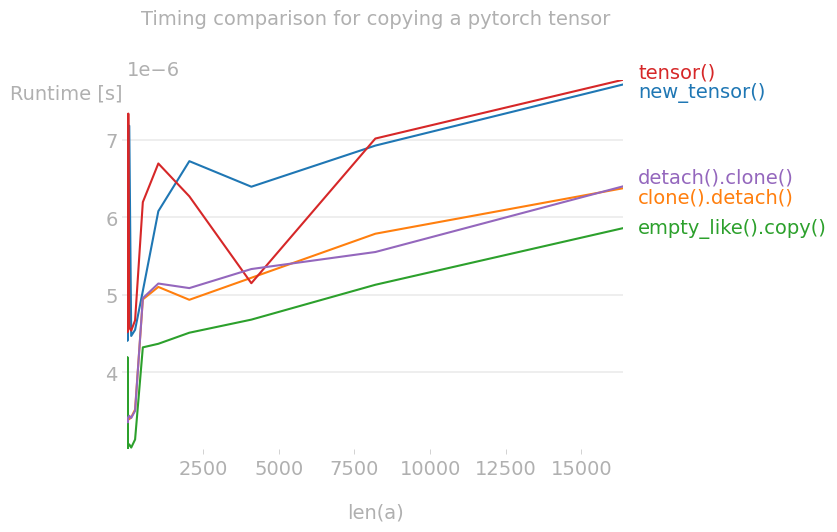

In [40]:
import perfplot

perfplot.show(
    setup=lambda n: torch.randn(n),
    kernels=[
        lambda a: a.new_tensor(a),
        lambda a: a.clone().detach(),
        lambda a: torch.empty_like(a).copy_(a),
        lambda a: torch.tensor(a),
        lambda a: a.detach().clone(),
    ],
    labels = ["new_tensor()", "clone().detach()", "empty_like().copy()", "tensor()", "detach().clone()"],
    n_range = [2 ** k for k in range(15)],
    xlabel="len(a)",
    logx=False,
    logy=False,
    title="Timing comparison for copying a pytorch tensor"
)

### GPU 사용


In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [43]:
torch.ones([2, 4], dtype=torch.float64, device=device)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], device='cuda:0', dtype=torch.float64)

In [44]:
# to 메서드 이용
x = torch.tensor([[1., -1.], [1., -1.]])
x.to(device)

tensor([[ 1., -1.],
        [ 1., -1.]], device='cuda:0')

In [46]:
print(x[0][0].item())

1.0


### Shape, dtype, device

In [49]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}") # tensor.size()
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")
print(f"Number of dimension: {tensor.ndim}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Number of dimension: 2


### 유용한 tensor 기능들

In [25]:
original_tensor = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)

# new()를 사용하여 기존 tensor와 동일한 속성을 가진 새로운 tensor 생성
print(original_tensor.new(2, 2))
print(original_tensor.new_zeros(2, 2))
print(original_tensor.new_ones(2, 2))
print(original_tensor.new_full((2, 2), fill_value=7.0))

# tensor.new_tensor(x) is equivalent to x.clone().detach()

tensor([[ 2.7019e-24,  4.5843e-41],
        [-5.7377e-37,  3.0785e-41]])
tensor([[0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.]])
tensor([[7., 7.],
        [7., 7.]])


In [50]:
data = torch.zeros(3, 4)
print(torch.empty_like(data))
print(torch.zeros_like(data))
print(torch.ones_like(data))
print(torch.full_like(data, 3.14))
print(torch.rand_like(data))
print(torch.randn_like(data))

tensor([[ 2.7019e-24,  4.5843e-41, -2.3780e+02,  3.0785e-41],
        [ 1.6255e-43,  5.6052e-44,  1.4293e-43,  4.7644e-44],
        [ 9.5288e-44,  1.3593e-43,  1.6255e-43,  1.3593e-43]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[3.1400, 3.1400, 3.1400, 3.1400],
        [3.1400, 3.1400, 3.1400, 3.1400],
        [3.1400, 3.1400, 3.1400, 3.1400]])
tensor([[0.8973, 0.3223, 0.1986, 0.3935],
        [0.2570, 0.5484, 0.5782, 0.2950],
        [0.5016, 0.6242, 0.7964, 0.9990]])
tensor([[ 0.4964, -0.9675,  0.5611, -0.0580],
        [-0.1347, -0.7498,  0.9419,  1.0243],
        [-1.0429,  0.4296, -0.3132,  0.8345]])


In [52]:
print(torch.arange(5))
print(torch.arange(1, 4))
print(torch.arange(1, 4, 0.2))
print(torch.range(1, 4, 0.5))

print(torch.linspace(1, 4, 20))
print(torch.logspace(1, 4, 20))

tensor([0, 1, 2, 3, 4])
tensor([1, 2, 3])
tensor([1.0000, 1.2000, 1.4000, 1.6000, 1.8000, 2.0000, 2.2000, 2.4000, 2.6000,
        2.8000, 3.0000, 3.2000, 3.4000, 3.6000, 3.8000])
tensor([1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000])
tensor([1.0000, 1.1579, 1.3158, 1.4737, 1.6316, 1.7895, 1.9474, 2.1053, 2.2632,
        2.4211, 2.5789, 2.7368, 2.8947, 3.0526, 3.2105, 3.3684, 3.5263, 3.6842,
        3.8421, 4.0000])
tensor([   10.0000,    14.3845,    20.6914,    29.7635,    42.8133,    61.5848,
           88.5867,   127.4275,   183.2981,   263.6651,   379.2690,   545.5594,
          784.7599,  1128.8379,  1623.7767,  2335.7214,  3359.8184,  4832.9302,
         6951.9277, 10000.0000])


<ipython-input-52-2edae034c9c4>:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  print(torch.range(1, 4, 0.5))


#### 복소수
https://pytorch.org/docs/stable/tensor.html 참조

In [53]:
real = torch.FloatTensor([1, 2, 3])
img = torch.FloatTensor([4, 5, 6])

torch.complex(real, img)

tensor([1.+4.j, 2.+5.j, 3.+6.j])

#### in_place
method 뒤에 `_`가 있으면 `in_place=True` 구조와 같다(원본자체를 바꿈)
> 바꿔치기 연산은 메모리를 일부 절약하지만, 기록(history)이 즉시 삭제되어 도함수(derivative) 계산에 문제가 발생할 수 있다. 따라서 사용을 권장하지 않는다.

In [58]:
a = torch.randn(4, 4)
print(a)
a.fill_(3.5)
print(a)
a.add_(5)
#.zero_()
print(a)
print(a.abs())

tensor([[ 0.5859, -0.3255, -0.7023, -0.9771],
        [ 0.7893,  0.6367, -0.1856, -0.2720],
        [-0.3070, -1.0728, -1.7261, -0.0610],
        [ 1.3561, -0.5469,  0.6255, -0.5569]])
tensor([[3.5000, 3.5000, 3.5000, 3.5000],
        [3.5000, 3.5000, 3.5000, 3.5000],
        [3.5000, 3.5000, 3.5000, 3.5000],
        [3.5000, 3.5000, 3.5000, 3.5000]])
tensor([[8.5000, 8.5000, 8.5000, 8.5000],
        [8.5000, 8.5000, 8.5000, 8.5000],
        [8.5000, 8.5000, 8.5000, 8.5000],
        [8.5000, 8.5000, 8.5000, 8.5000]])
tensor([[8.5000, 8.5000, 8.5000, 8.5000],
        [8.5000, 8.5000, 8.5000, 8.5000],
        [8.5000, 8.5000, 8.5000, 8.5000],
        [8.5000, 8.5000, 8.5000, 8.5000]])


#### contiguous
